# getting the data

We will fetch the data from the habitat api and store it in a file.
The reason we are not directly importing the json into our data structure is to have reproducible steps and data when training and especially evaluating our model.

### fetching the data from the api

In [19]:
import urllib.request, json
with urllib.request.urlopen("https://habitat-lifesupport.herokuapp.com/measurements?token=Gafdiweq931") as url:
    data = json.loads(url.read())

### saving to file

In [20]:
with open("measurements.json", "w") as file:
    json.dump(data, file)

### loading data from file into a panda dataframe

In [21]:
import pandas as pd
with open("measurements.json") as file:
    data = pd.read_json(file)

### make usable features (feature extension?)

We need to change the date to some number that a linear regression model can actually use.
Before we go into some of the more involved methods like 1-of-K encoding, we are going to try to extract some numbers from the date.

#### extract hour and month

In [22]:
data['hour'] = pd.DatetimeIndex(data['measuredAt']).hour
data['month'] = pd.DatetimeIndex(data['measuredAt']).month

### create a test set

In [23]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

### split into features and label

In [24]:
feature_attributes = ['temperature', 'hour', 'month']
label_attributes = ['humidity']
X_train, y_train = train_set[feature_attributes], train_set[label_attributes]
X_test, y_test = test_set[feature_attributes], test_set[label_attributes]

### explore the data

In [25]:
X_train.describe()

,temperature,hour,month
count,4260.000000,4260.000000,4260.000000
mean,19.226925,11.444366,8.435211
std,2.048430,6.951748,2.889899
min,15.200000,0.000000,1.000000
25%,17.600000,5.000000,7.000000
50%,18.800000,11.000000,9.000000
75%,21.100000,17.000000,11.000000
max,24.700000,23.000000,12.000000


In [26]:
y_train.describe()

,humidity
count,4260.000000
mean,60.857676
std,6.717046
min,29.500000
25%,56.600000
50%,61.600000
75%,65.800000
max,79.900000


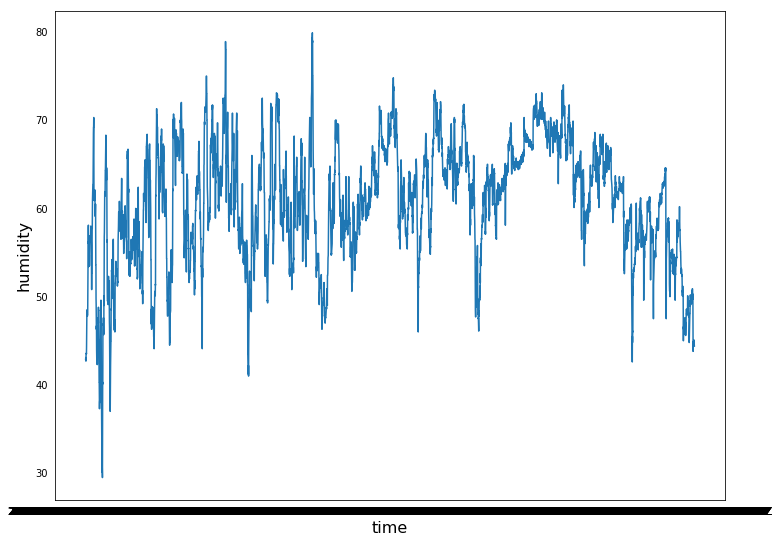

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.xlabel("time", fontsize=16)
plt.ylabel("humidity", fontsize=16)
x = data['measuredAt']
y = data['humidity']


plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")    
  
plt.plot(x, y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe414a8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1118f93c8>]], dtype=object)

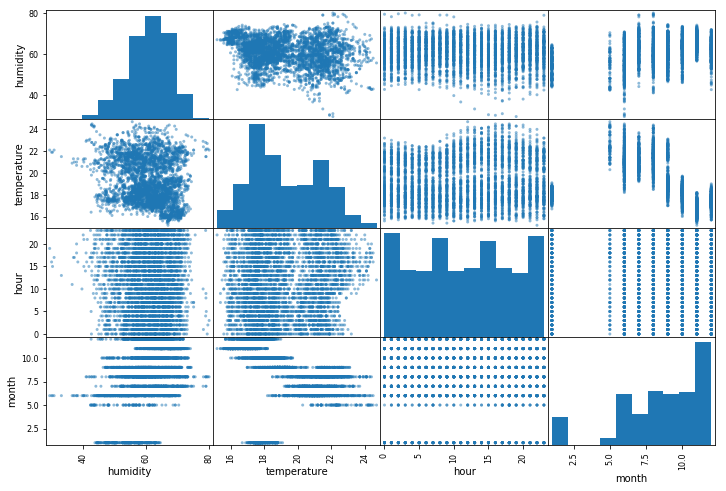

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_set, figsize=(12, 8))

In [29]:
X_train.shape

(4260, 3)

In [30]:
y_train.shape

(4260, 1)

## train model

### linear regression

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


6.2304793647423287

In [142]:
d = {'temperature': [17.5, 18], 'hour': [19, 20], 'month': [1,1]}
df = pd.DataFrame(data=d)
df

,hour,month,temperature
0,19,1,17.5
1,20,1,18.0


In [143]:
lin_reg.predict(df)

array([[ 68.80112502],
       [ 68.96543357]])

### plot the predictions vs measured values

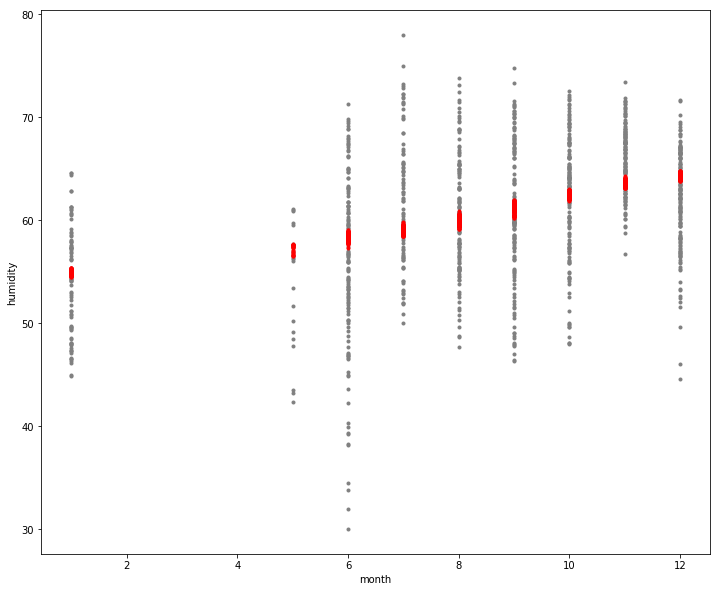

In [149]:
plt.figure(figsize=(12,10))
plt.plot(X_test['month'], y_test, '.', color='gray')
plt.plot(X_test['month'], predictions, '.', color='r')
plt.xlabel('month')
plt.ylabel('humidity')
plt.show()